Import all packages we are going to use

In [234]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

1. Read the csv

In [235]:
df = pd.read_csv("/Users/finngebauer/Code/Python/Spiced/datapoints.csv")

In [236]:
df.head() #check what's going on in the dataframe

,x,y
0,0.000000,0.496714
1,0.052632,0.019630
2,0.105263,0.963478
3,0.157895,1.996714
4,0.210526,0.397426


In [237]:
#create an array for each column for later tasks

xarr = np.array(df['x'])
yarr  = np.array(df['y'])

2. Create a simple scatterplot

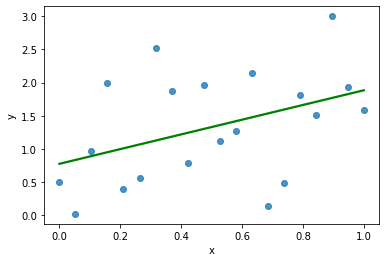

In [238]:
sns.regplot(x='x', y='y', data=df, ci=None, line_kws={'color': 'g'}) #I use a simple regplot for the regression line and omit the confidence intervals to have a cleaner view
plt.show()



3. calculate y values for x values

In [239]:
def y_predicted_calc(a,b,x):
    y_pred=[]
    for xi in x:
        y = a*xi+b
        y_pred.append(y)
    return y_pred
        
y_pred_list = y_predicted_calc(10,0, xarr)
print(y_pred_list)

[0.0, 0.526315789473684, 1.052631578947368, 1.578947368421052, 2.105263157894736, 2.631578947368421, 3.1578947368421053, 3.6842105263157894, 4.210526315789473, 4.7368421052631575, 5.263157894736842, 5.7894736842105265, 6.315789473684211, 6.842105263157894, 7.368421052631579, 7.894736842105264, 8.421052631578947, 8.94736842105263, 9.473684210526317, 10.0]


4. MSE calculation

In [240]:

def MSE(y_actual, y_pred):
    y_actual = np.array(y_actual)
    y_pred = np.array(y_pred)
    summation = np.subtract(y_actual,y_pred)
    squareddiff = summation**2
    MSE = squareddiff.mean() #instead of dividing by length of the input list/array, I take the mean right away
    return MSE

print(MSE(yarr, y_pred_list))
current_MSE = MSE(yarr, y_pred_list)

21.306499419071013


5. Find the lowest MSE based on a value

In [241]:
def lowest_mse_a(a, b, x, y):
    lowest_MSE_a = dict()
    while a > 0:
        a = a-0.1
        y_pred= y_predicted_calc(a, b, x)
        lowest_MSE_a.update([(a, MSE(y, y_pred))])
    return(min(lowest_MSE_a.items(), key= lambda x: x[1]))

lowest_mse_a(10, 0, xarr, yarr)

(2.2000000000000197, 0.7080422372498424)

6. Find the lowest MSE based on a&b values


After getting it to work, let's make it a callable function

In [245]:
def best_MSE(a, b, starting_MSE): 
    lowest_MSE = starting_MSE
    result_MSE =  [a*10,b*10,lowest_MSE]
    for a in range(a*10, 0, -1):
        for b in range(b*10, 0, -1):
            y_pred= y_predicted_calc(a/10, b/10, xarr)
            MSE_calc = MSE(yarr, y_pred)
            if MSE_calc < lowest_MSE:
                lowest_MSE = MSE_calc
                result_MSE[0] = a/10
                result_MSE[1] = b/10
                result_MSE[2] = lowest_MSE
            else:
                continue
    return(result_MSE)   

final_MSE = best_MSE(10, 10, current_MSE)

Time to fill the dataframe with the lowest values

In [246]:

df['y_pred_lowest'] = y_predicted_calc(final_MSE[0], final_MSE[1], xarr)
print(df)


           x         y  y_pred_lowest
0   0.000000  0.496714       0.800000
1   0.052632  0.019630       0.857895
2   0.105263  0.963478       0.915789
3   0.157895  1.996714       0.973684
4   0.210526  0.397426       1.031579
5   0.263158  0.555337       1.089474
6   0.315789  2.526581       1.147368
7   0.368421  1.872698       1.205263
8   0.421053  0.793684       1.263158
9   0.473684  1.963613       1.321053
10  0.526316  1.115530       1.378947
11  0.578947  1.271112       1.436842
12  0.631579  2.136699       1.494737
13  0.684211  0.139351       1.552632
14  0.736842  0.485608       1.610526
15  0.789474  1.806134       1.668421
16  0.842105  1.513485       1.726316
17  0.894737  2.998458       1.784211
18  0.947368  1.934081       1.842105
19  1.000000  1.587696       1.900000


7. How can the algorithm be improved?

It is not the prettiest code, especially with the limitations of the range() function only being able to use integers. Not sure if there is another way to implement a loop for this case.

Additionally, while I tried to use as many Numpy arrays as possible to speed up processes, there are probably still ways to make it quicker for larger data frames

Regarding my code, a lot of the variable names are pretty similar and this can get confusing.